# Survival Models

Some distributions model events that may happen over time.

This family of models is called **Survival Models** because they were first used in the medical field to estimate the survival probabilities over time of patients.

The main concept in survival analysis is **data censoring**: a portion of your dataset are going to die, but we haven't observed it yet, because it will happen in the future.

Survival analysis is useful for all sorts of other events, like time to paid conversion for free users on a website, etc.

### Manually Fitting a probability distribution to data

In [15]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
data = statsmodels.datasets.heart.load_pandas().data
data.sample(5)

,survival,censors,age
39,551.0,1.0,48.9
47,63.0,1.0,56.4
41,228.0,1.0,19.7
37,65.0,1.0,49.1
34,875.0,0.0,38.9


Text(0, 0.5, 'Number of patients')

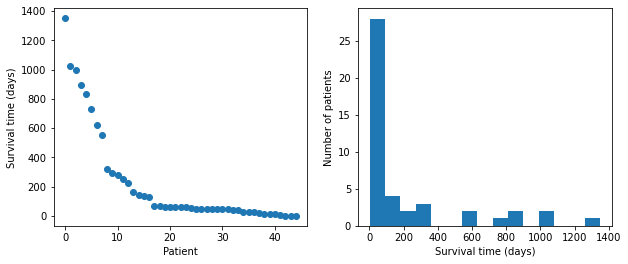

In [16]:
data = data[data.censors == 1]
survival = data.survival

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

Text(0, 0.5, 'Number of patients')

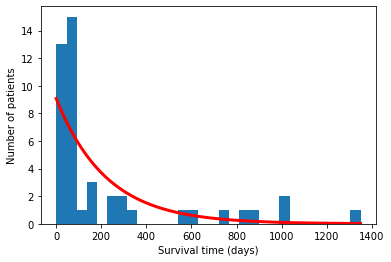

In [17]:
smean = survival.mean()
rate = 1. / smean

smax = survival.max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two
# consecutive values in `days`
dt = smax / 999.

dist_exp = st.expon.pdf(days, scale=1. / rate)

nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

# Statsmodels Survival Regression

Survival regression in statsmodels can come in the [Cox Proportional Hazards model](https://www.statsmodels.org/stable/generated/statsmodels.duration.hazard_regression.PHReg.html#statsmodels.duration.hazard_regression.PHReg), which supports censored data: 

In [18]:
import statsmodels.api as sm

y = data.survival
X = sm.add_constant(data.age)
censor = data.censors

est = sm.PHReg(y, X, status=censor).fit()
est.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: PHReg
=======================================================
Model:                   PH Reg      Sample size:    45
Dependent variable:      survival    Num. events:    45
Ties:                    Breslow                       
-------------------------------------------------------
       log HR log HR SE   HR    t  P>|t|  [0.025 0.975]
-------------------------------------------------------
const -0.0000       nan 1.0000 nan    nan    nan    nan
age    0.0001    0.0000 1.0001 inf 0.0000 1.0001 1.0001
=======================================================
Confidence intervals are for the hazard ratios
"""

In [19]:
data.columns

Index(['survival', 'censors', 'age'], dtype='object')

Statsmodels also supports survival functions with right censoring:

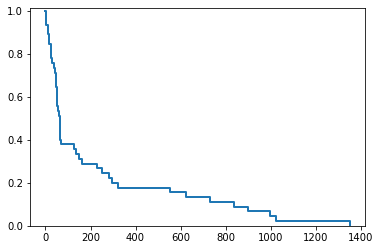

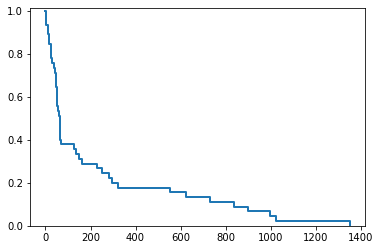

In [12]:
sm.SurvfuncRight(y, status=censor).plot()

# Lifelines Package

A popular package for survival analysis is [lifelines](https://lifelines.readthedocs.io/en/latest/) which you need to install

In [13]:
# Run if necessary
# !pip install lifelines

In [3]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

df.sample(5)

,T,E,group
146,53.0,1,control
114,56.0,1,control
103,48.0,1,control
74,68.0,1,control
144,45.0,0,control


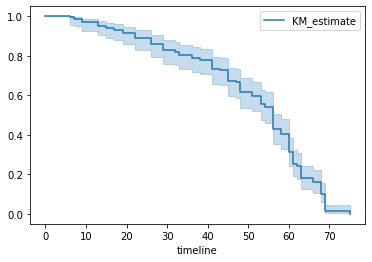

In [4]:
from lifelines import KaplanMeierFitter

T = df['T']
E = df['E']

kmf = KaplanMeierFitter()
kmf.fit(T, E)
kmf.plot_survival_function()

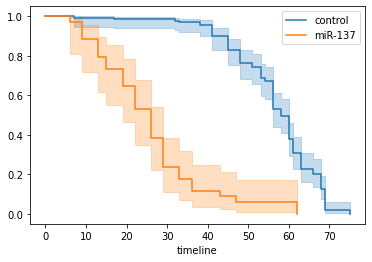

In [5]:
groups = df['group']
ix = (groups == 'miR-137')
kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot_survival_function()
kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot_survival_function(ax=ax)

0       6.0
1      13.0
2      13.0
3      13.0
4      19.0
       ... 
158    60.0
159    60.0
160    60.0
161    60.0
162    66.0
Name: T, Length: 163, dtype: float64

### Survival Regression in lifelines

<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 189
   partial log-likelihood = -807.62
         time fit was run = 2021-02-07 01:59:20 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
var1        0.22       1.25       0.07             0.08             0.37                 1.08                 1.44
var2        0.05       1.05       0.08            -0.11             0.21                 0.89                 1.24
var3        0.22       1.24       0.08             0.07             0.37                 1.07                 1.44

             z      p   -log2(p)
covariate                       
var1      2.99 <0.005       8.49
var2      0.61   0.54       0.89
var3      2.88 <0.005       7.97
---
Concordance = 0.58
Partial AIC = 1621.24
log-likelihood ratio test = 15.54 on 3 df
-log2(p) of ll-ratio test = 9.47

None


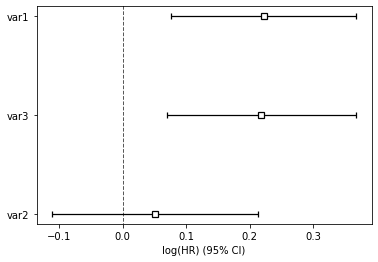

In [12]:
from lifelines.datasets import load_regression_dataset
df = load_regression_dataset()

from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df, 'T', event_col='E')
print(cph.print_summary())
cph.plot()

<lifelines.WeibullAFTFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
   number of observations = 200
number of events observed = 189
           log-likelihood = -504.48
         time fit was run = 2021-02-07 01:59:23 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ var1       -0.08       0.92       0.02            -0.13            -0.04                 0.88                 0.97
        var2       -0.02       0.98       0.03            -0.07             0.04                 0.93                 1.04
        var3       -0.08       0.92       0.02            -0.13            -0.03                 0.88                 0.97
        Intercept   2.53      12.57       0.05             2.43             2.63                11.41                13.85
rho_    Intercept   1.09       2.98       0.05             0.99             1.20                 2.68                 3.32

                      z      p   -log2(p)
param   covariate                        
lambda_ var1      -3.45 <0.005      10.78
        var2      -0.56   0.57       0.80
        var3      -3.33 <0.005      10.15
        Intercept 51.12 <0.005        inf
rho_    Intercept 20.12 <0.005     296.66
---
Concordance = 0.58
AIC = 1018.97
log-likelihood ratio test = 19.73 on 3 df
-log2(p) of ll-ratio test = 12.34

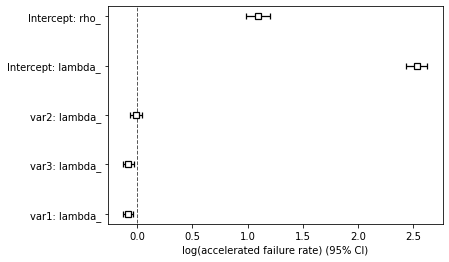

In [13]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(df, 'T', event_col='E')
wft.print_summary()

wft.plot()